In [3]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
print('done')

done


In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\Lenovo\\Complete_AI_DL_Batch_10_12'

In [6]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'ANN_ Attrition Rate_Churn Rate.ipynb',
 'class 8_Activation func.ipynb',
 'Class_9_Loss Functions.ipynb',
 'Day 4_DL.ipynb',
 'Day 6_ 7_Activation Functions.ipynb',
 'Day2.ipynb',
 'day3.ipynb',
 'Day4.ipynb',
 'Day5.ipynb',
 'gd_and_sgd.ipynb',
 'Gradient_descent_from_scratch.ipynb',
 'Optimizers.ipynb',
 'student_scores.csv']

In [7]:
os.listdir(os.chdir('C:\\Users\\Lenovo\\Downloads\\customer_churn_data.csv'))

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\Lenovo\\Downloads\\customer_churn_data.csv'

In [13]:
path = 'C:\\Users\\Lenovo\\Downloads\\customer_churn_data.csv'

df = pd.read_csv(path)
df.shape

(7043, 21)

# EDA, Feature Engineering, Feature Scaling

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
df.shape

(7043, 21)

In [17]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2525,3133-PZNSR,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Yes,Two year,Yes,Credit card (automatic),97.75,6991.6,No


In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df1 = df.drop('customerID',axis=1) # columns

In [20]:
(df1.isna().sum()/len(df1))*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [21]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df1['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
for i in df1:
    if df1[i].dtypes == 'object':
#         print(df1[i].dtypes)
        print(f"{i}:->> {df[i].unique()}")

gender:->> ['Female' 'Male']
Partner:->> ['Yes' 'No']
Dependents:->> ['No' 'Yes']
PhoneService:->> ['No' 'Yes']
MultipleLines:->> ['No phone service' 'No' 'Yes']
InternetService:->> ['DSL' 'Fiber optic' 'No']
OnlineSecurity:->> ['No' 'Yes' 'No internet service']
OnlineBackup:->> ['Yes' 'No' 'No internet service']
DeviceProtection:->> ['No' 'Yes' 'No internet service']
TechSupport:->> ['No' 'Yes' 'No internet service']
StreamingTV:->> ['No' 'Yes' 'No internet service']
StreamingMovies:->> ['No' 'Yes' 'No internet service']
Contract:->> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:->> ['Yes' 'No']
PaymentMethod:->> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:->> ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:->> ['No' 'Yes']


In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
df2 = df1.replace({'No phone service':'No','No internet service':'No','No':0,'Yes':1})

In [27]:
df3 = df2.replace({'No':0})

In [28]:
for i in df3:
    
#       print(df1[i].dtypes)
        print(f"{i}:->> {df3[i].unique()}")

gender:->> ['Female' 'Male']
SeniorCitizen:->> [0 1]
Partner:->> [1 0]
Dependents:->> [0 1]
tenure:->> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:->> [0 1]
MultipleLines:->> [0 1]
InternetService:->> ['DSL' 'Fiber optic' 0]
OnlineSecurity:->> [0 1]
OnlineBackup:->> [1 0]
DeviceProtection:->> [0 1]
TechSupport:->> [0 1]
StreamingTV:->> [0 1]
StreamingMovies:->> [0 1]
Contract:->> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:->> [1 0]
PaymentMethod:->> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:->> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:->> ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:->> [0 1]


In [29]:
df1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [30]:
df3['InternetService'] = df3['InternetService'].replace(0,'No')

In [31]:
df3['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [32]:
df4 = pd.get_dummies(data=df3,columns=['InternetService','Contract','PaymentMethod'],dtype=int,drop_first=True)

In [33]:
df4.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6771,Male,0,1,1,31,1,0,0,0,0,...,20.65,702.05,0,0,1,0,0,0,1,0


In [34]:
df5 = df4.replace({'Female':0,'Male':1})

In [35]:
for i in df5:
    print(f"{i}:->> {df5[i].unique()}")

gender:->> [0 1]
SeniorCitizen:->> [0 1]
Partner:->> [1 0]
Dependents:->> [0 1]
tenure:->> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:->> [0 1]
MultipleLines:->> [0 1]
OnlineSecurity:->> [0 1]
OnlineBackup:->> [1 0]
DeviceProtection:->> [0 1]
TechSupport:->> [0 1]
StreamingTV:->> [0 1]
StreamingMovies:->> [0 1]
PaperlessBilling:->> [1 0]
MonthlyCharges:->> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:->> ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:->> [0 1]
InternetService_Fiber optic:->> [0 1]
InternetService_No:->> [0 1]
Contract_One year:->> [0 1]
Contract_Two year:->> [0 1]
PaymentMethod_Credit card (automatic):->> [0 1]
PaymentMethod_Electronic check:->> [1 0]
PaymentMethod_Mailed check:->> [0 1]


In [36]:
df5['TotalCharges']  = df5['TotalCharges'].apply(lambda x: 0 if x == ' ' else float(x))

In [37]:
df5.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int32
InternetService_No                         int32
Contract_One year                          int32
Contract_Two year   

In [38]:
# feature scaling

In [39]:
df5.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,64.761692,2279.734304,0.265370,0.439585,0.216669,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,30.090047,2266.794470,0.441561,0.496372,0.412004,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,89.850000,3786.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
import seaborn as sns

<Axes: xlabel='gender', ylabel='count'>

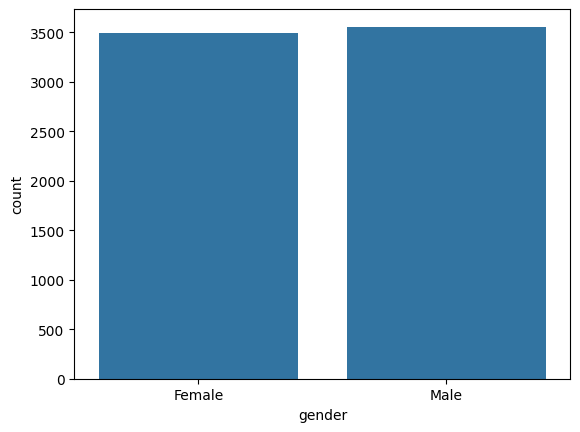

In [41]:
sns.countplot(data= df4, x = 'gender')

In [42]:
df4.groupby(['gender','Churn'])

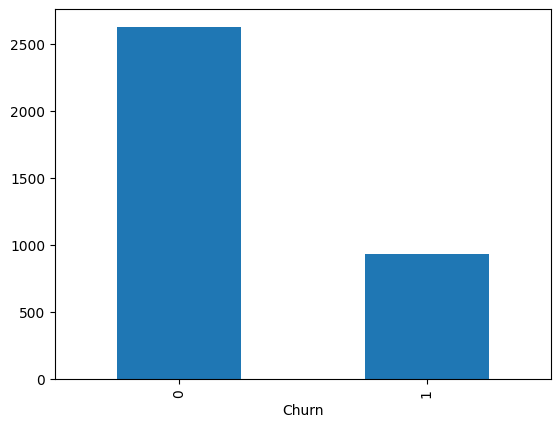

In [43]:
df4[df4['gender'] == 'Male']['Churn'].value_counts().plot(kind='bar')
plt.show()

In [44]:
df4[df4['gender'] == "Male"]['Churn'].value_counts()

Churn
0    2625
1     930
Name: count, dtype: int64

<Axes: xlabel='Churn'>

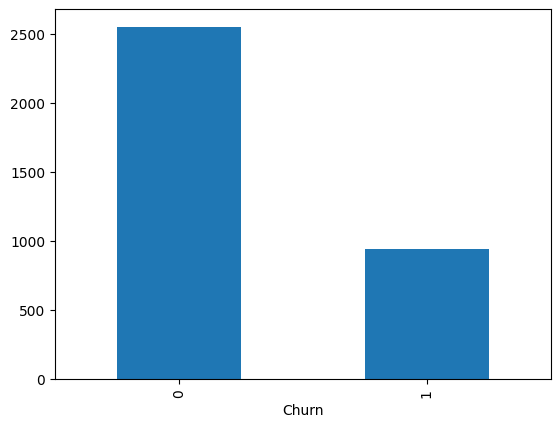

In [45]:
df4[df4['gender'] == 'Female']['Churn'].value_counts().plot(kind='bar')

In [46]:
df4[df4['gender'] == 'Female']['Churn'].value_counts()

Churn
0    2549
1     939
Name: count, dtype: int64

In [47]:
df4[df4['gender'] == 'Male']['Churn'].value_counts()

Churn
0    2625
1     930
Name: count, dtype: int64

In [48]:
customer_not_left = df5[df5['Churn'] == 0]['tenure']

In [49]:
customer_left = df5[df5['Churn'] == 1]['tenure']

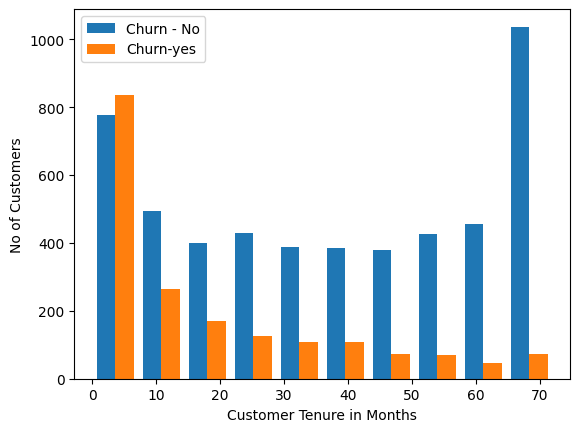

In [50]:
plt.hist([customer_not_left,customer_left],label=['Churn - No', 'Churn-yes'])
plt.xlabel('Customer Tenure in Months')
plt.ylabel('No of Customers')
plt.legend()
plt.show()

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
min_max = MinMaxScaler()

In [53]:
df5['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [54]:
df5[['tenure','MonthlyCharges','TotalCharges']] = min_max.fit_transform(df5[['tenure','MonthlyCharges','TotalCharges']])

In [55]:
df5.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.449599,0.903166,0.421837,0.286668,0.344881,0.343888,...,0.462803,0.262497,0.265370,0.439585,0.216669,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,0.341104,0.295752,0.493888,0.452237,0.475363,0.475038,...,0.299403,0.261007,0.441561,0.496372,0.412004,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.171642,0.045891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.518408,0.160574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.712438,0.436003,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
customer_not_left = df5[df5['Churn'] == 0]['tenure']
customer_left = df5[df5['Churn'] == 1]['tenure']

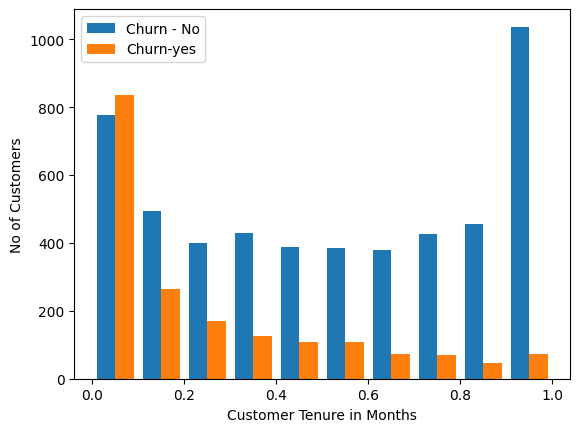

In [57]:
plt.hist([customer_not_left,customer_left],label=['Churn - No', 'Churn-yes'])
plt.xlabel('Customer Tenure in Months')
plt.ylabel('No of Customers')
plt.legend()
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df5.drop('Churn',axis=1)

In [60]:
y = df5['Churn']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [62]:
X_train.shape

(5634, 23)

In [63]:
y_train.shape

(5634,)

In [64]:
X_test.shape

(1409, 23)

In [65]:
y_test.shape

(1409,)

# ANN Model

In [66]:
X_train.shape[1]

23

In [67]:
df5.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int32
InternetService_No                         int32
Contract_One year                          int32
Contract_Two year   

In [68]:
model = Sequential([
    Dense(10,input_shape=(X_train.shape[1],),activation = 'relu'),
    Dense(1,activation='sigmoid')
])


model.compile(optimizer='adam',metrics= ['accuracy'],loss = 'binary_crossentropy')

In [69]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100


177/177 [==============================] - 1s 2ms/step - loss: 0.5291 - accuracy: 0.7346
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4583 - accuracy: 0.7739
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.7877
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.7946
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7961
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7984
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4244 - accuracy: 0.7961
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8003
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.7989
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4227 - accu

177/177 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8094
Epoch 77/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8081
Epoch 78/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8094
Epoch 79/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8076
Epoch 80/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8095
Epoch 81/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8083
Epoch 82/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8085
Epoch 83/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8099
Epoch 84/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8099
Epoch 85/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 

In [70]:
y_pred = model.predict(X_test)

45/45 [==============================] - 0s 1ms/step


In [73]:
y_pred

array([[0.6183651 ],
       [0.06300356],
       [0.00449543],
       ...,
       [0.02276884],
       [0.01619685],
       [0.40892032]], dtype=float32)

In [76]:
y_pred = np.where(y_pred<0.5,0,1)

In [77]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int64

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



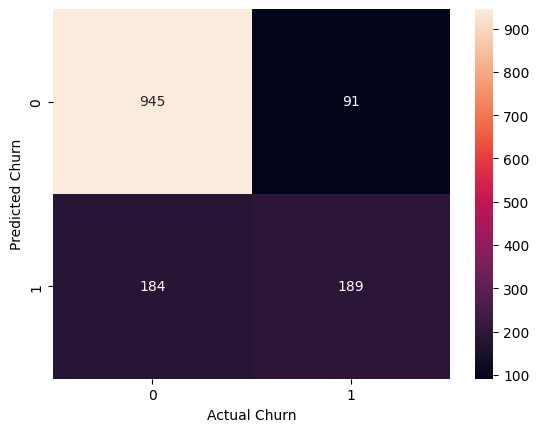

In [88]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt = 'd')
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn')
plt.show()

# Final Conclusion